In [1]:
# Import machine learning libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ["Model Name", "r2", "RMSE"]

In [2]:
lt = pd.read_csv("length.csv")
lt.head(10)

,X,T,L,N,Y
0,15,235,100,25,14.884
1,15,235,150,50,14.952
2,15,235,200,75,14.984
3,15,240,100,50,14.926
4,15,240,150,75,14.920
5,15,240,200,25,14.889
6,15,245,100,75,14.950
7,15,245,150,25,14.877
8,15,245,200,50,14.981
9,5,235,100,25,4.869


In [3]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       108 non-null    int64  
 1   T       108 non-null    int64  
 2   L       108 non-null    int64  
 3   N       108 non-null    int64  
 4   Y       108 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.3 KB


In [4]:
lt.describe().T

,count,mean,std,min,25%,50%,75%,max
X,108.0,13.166667,23.478564,3.000,4.5000,6.500,7.00000,90.000
T,108.0,240.000000,4.101516,235.000,235.0000,240.000,245.00000,245.000
L,108.0,150.000000,41.015156,100.000,100.0000,150.000,200.00000,200.000
N,108.0,50.000000,20.507578,25.000,25.0000,50.000,75.00000,75.000
Y,108.0,13.077704,23.438711,2.018,3.9325,6.422,7.03875,90.201


In [5]:
X = lt.drop("Y", axis=1)
y = lt["Y"]

# Scaling

In [6]:
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
test_size = 0.3 
seed = 17  # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Model Building - Regression

In [7]:
regression_model = LinearRegression()
regression_model.fit(X,y)
lin_score = "%.4f" % regression_model.score(X_test, y_test)
print("Linear Regression Score: ",lin_score)

Linear Regression Score:  0.9999


In [8]:
regression_model.coef_

array([ 8.68494560e+01, -2.57777778e-02,  7.29444444e-02, -3.88888889e-03])

In [9]:
regression_model.intercept_

2.90699045911534

In [10]:
regression_model.predict(X_test)
y_pred = regression_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.23337608753915137

In [11]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9999410582062986
0.9999279005883155


In [12]:
class CompareModel:
    def __init__(self):
        import pandas as pd
        self._models = pd.DataFrame(
            data=['r', 'R^2', 'RMSE'],
            columns=['Model']
        ).set_index(keys='Model')
        
    def add(self, model_name, y_test, y_pred):
        import numpy as np
        self._models[model_name] = np.array(
            object=[
                np.corrcoef(y_test, y_pred)[0, 1], # r
                r2_score(y_true=y_test, y_pred=y_pred), # R^2
                np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)) # RMSE
                #np.sqrt(np.mean(((y_test-y_pred)/y_test)**2)), # RMSRE
                #np.mean(np.abs((y_test-y_pred) / y_test)) * 100 # MAPE
            ]
        )
        
    def R2AndRMSE(y_test, y_pred):
        from sklearn.metrics import r2_score, mean_squared_error
        return r2_score(y_true=y_test, y_pred=y_pred), np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
    
    @property
    def models(self):
        return self._models
    
    @models.setter
    def models(self, _):
        print('Cannot perform such task.')
    
    def show(self, **kwargs):
        import matplotlib.pyplot as plt
        kwargs['marker'] = kwargs.get('marker', 'X')
        self._models.plot(**kwargs)
        plt.xticks(range(len(self._models)), self._models.index)
        plt.xlabel('')
        plt.axis('auto')
        plt.show()

In [13]:
# Metrics
lr= CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)
lr_r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(lr_r2)

from sklearn.metrics import r2_score, mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
lr_rmse

0.9999279005883155


0.23337608753915137

+-------------------+-----+-------+
|    Model Name     | r2  | RMSE  |
+-------------------+-----+-------+
| Linear Regression | 1.0 | 0.233 |
+-------------------+-----+-------+


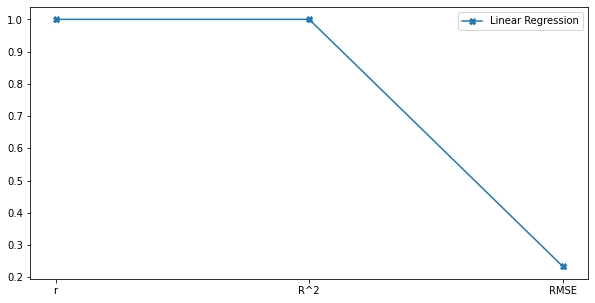

In [14]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers = ["Model Name", "r2", "RMSE"]

table1 = table.append_row(["Linear Regression", lr_r2,lr_rmse])
print(table)

plot = CompareModel()
from sklearn.metrics import r2_score, mean_squared_error
plot.add(model_name='Linear Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))

# Lasso

In [15]:
# Fitting training set to lasso regression model
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)


# Predicting the yield
y_pred = lasso.predict(X_test)

CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9996392473666422, 0.522029744615556)

+-------------------+-----+-------+
|    Model Name     | r2  | RMSE  |
+-------------------+-----+-------+
| Linear Regression | 1.0 | 0.233 |
+-------------------+-----+-------+
|       Lasso       | 1.0 | 0.522 |
+-------------------+-----+-------+


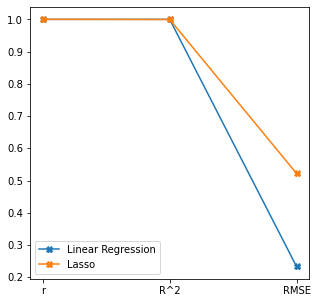

In [16]:
lasso_r2 = r2_score(y_true=y_test, y_pred=y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

table.append_row(["Lasso", lasso_r2,lasso_rmse])
print(table)

plot.add('Lasso', y_test, y_pred)
plot.show(figsize=(5, 5))

# Ridge

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9994688143056316, 0.6334519529868123)

+-------------------+-------+-------+
|    Model Name     |  r2   | RMSE  |
+-------------------+-------+-------+
| Linear Regression |  1.0  | 0.233 |
+-------------------+-------+-------+
|       Lasso       |  1.0  | 0.522 |
+-------------------+-------+-------+
|       Ridge       | 0.999 | 0.633 |
+-------------------+-------+-------+


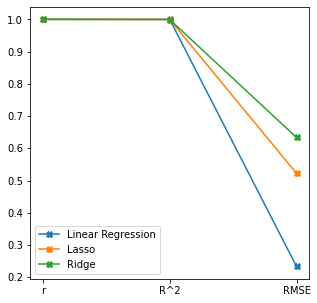

In [18]:
ridge_r2 = r2_score(y_true=y_test, y_pred=y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

table.append_row(["Ridge", ridge_r2,ridge_rmse])
print(table)

plot.add('Ridge', y_test, y_pred)
plot.show(figsize=(5, 5))

# Random Forest

In [19]:
# Fitting Random Forest model to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=7, n_jobs=-1)
rfr.fit(X_train, y_train)

# Predicting the yield
y_pred = rfr.predict(X_test)

CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)

(0.9999183589045876, 0.24833898736208107)

+-------------------+-------+-------+
|    Model Name     |  r2   | RMSE  |
+-------------------+-------+-------+
| Linear Regression |  1.0  | 0.233 |
+-------------------+-------+-------+
|       Lasso       |  1.0  | 0.522 |
+-------------------+-------+-------+
|       Ridge       | 0.999 | 0.633 |
+-------------------+-------+-------+
|   Random Forest   |  1.0  | 0.248 |
+-------------------+-------+-------+


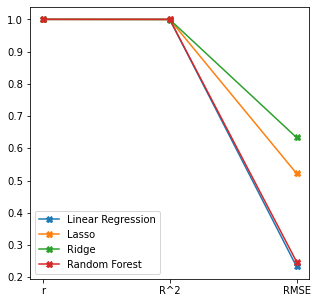

In [20]:
rf_r2 = r2_score(y_true=y_test, y_pred=y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
table.append_row(["Random Forest", rf_r2,rf_rmse])
print(table)

plot.add('Random Forest', y_test, y_pred)
plot.show(figsize=(5, 5))

# XGBoost

In [21]:
# Fitting XGBoost to the dataset  (reg:squarederror)
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs=4, silent=False, objective='reg:linear',
                   max_depth=3, random_state=50, n_estimators=100,
                   learning_rate=0.3, verbose=True)
xgb.fit(X_train, y_train)

# Predicting the yield
y_pred = xgb.predict(X_test)

CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)

[07:26:33] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:26:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




(0.999903316769692, 0.27025022888419614)

+-------------------+-------+-------+
|    Model Name     |  r2   | RMSE  |
+-------------------+-------+-------+
| Linear Regression |  1.0  | 0.233 |
+-------------------+-------+-------+
|       Lasso       |  1.0  | 0.522 |
+-------------------+-------+-------+
|       Ridge       | 0.999 | 0.633 |
+-------------------+-------+-------+
|   Random Forest   |  1.0  | 0.248 |
+-------------------+-------+-------+
|      XGBoost      |  1.0  | 0.27  |
+-------------------+-------+-------+


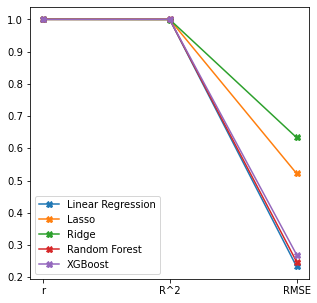

In [22]:
XGBoost_r2 = r2_score(y_true=y_test, y_pred=y_pred)
XGBoost_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
table.append_row(["XGBoost", XGBoost_r2,XGBoost_rmse])
print(table)

plot.add('XGBoost', y_test, y_pred)
plot.show(figsize=(5, 5))

# Voting Regression

In [23]:
# Fitting training set to voting regression model
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('LinReg', regression_model),
                                 ('RanFor', rfr),
                                 ('XGBoost', xgb)
                                ],
                     n_jobs=-1,
                     weights=[4, 2, 3])
vr.fit(X_train, y_train)

# Predicting the yield
y_pred = vr.predict(X_test)

CompareModel.R2AndRMSE(y_test=y_test, y_pred=y_pred)

vr_r2 = r2_score(y_true=y_test, y_pred=y_pred)
vr_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

+-------------------+-------+-------+
|    Model Name     |  r2   | RMSE  |
+-------------------+-------+-------+
| Linear Regression |  1.0  | 0.233 |
+-------------------+-------+-------+
|       Lasso       |  1.0  | 0.522 |
+-------------------+-------+-------+
|       Ridge       | 0.999 | 0.633 |
+-------------------+-------+-------+
|   Random Forest   |  1.0  | 0.248 |
+-------------------+-------+-------+
|      XGBoost      |  1.0  | 0.27  |
+-------------------+-------+-------+
| Voting Regression |  1.0  | 0.249 |
+-------------------+-------+-------+


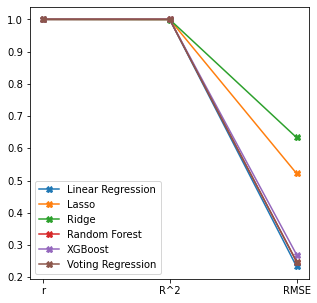

In [24]:
table.append_row(["Voting Regression", vr_r2,vr_rmse])
print(table)

plot.add('Voting Regression', y_test, y_pred)
plot.show(figsize=(5, 5))